In [22]:
from matplotlib.pyplot import figure, show, subplots
from matplotlib import pyplot as plt
import numpy as np
import random
from scipy.optimize import curve_fit

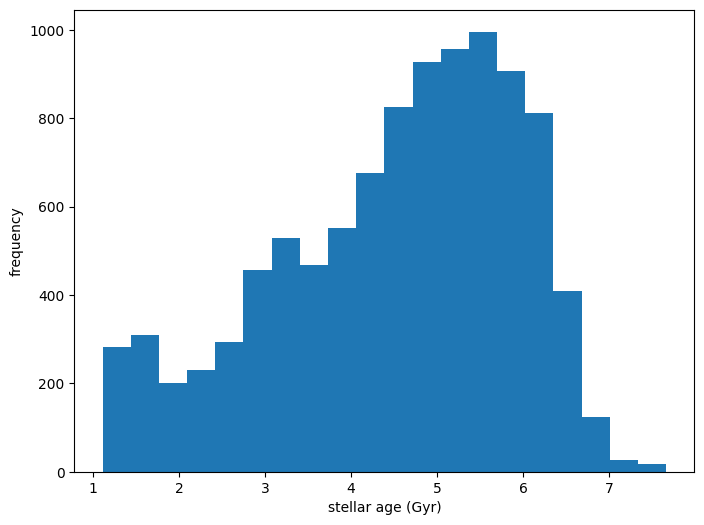

In [5]:
# generate stellar ages for p-pop

agebin = [7.664974490130835, 7.421319890726927, 7.162436399602606, 6.903553257029316, 6.6446701144560265, 6.416243709670467, 6.157360567097177, 5.8908626301126485, 5.654822476568947, 5.403553431304832, 5.137055494320302, 4.885786449056187, 4.64213184965228, 4.383248358527958, 4.131979313263843, 3.873096519241585, 3.6446701144560265, 3.3705584287133554, 3.1269031322073815, 2.860405892324918, 2.6319794875393585, 2.373095996415036, 2.121826951150921, 1.8629441571286645, 1.6192888606226905, 1.3756342612187824, 1.109137021336319]
frequency = [0.031153597012442847, 0.15576370689728483, 0.311527413794575, 0.8099692793889274, 2.4610600091242563, 5.700935700625, 10.74766440270338, 13.925233613206725, 13.457943918569839, 14.7040500086107, 16.292834970376113, 15.327102697117388, 12.61682246822344, 12.741433291135772, 10.436136988908803, 8.16199428369428, 8.566978210361256, 7.538940882160103, 8.317757990591568, 6.853583138710995, 5.451714054800334, 3.925234861004826, 3.3021814594706553, 2.1806861923421215, 5.327103944915487, 4.1433029098170495, 4.361370958629269]
frequencycum = [0.031153597012442847]
for i in range(len(frequency)):
    if i == 0:
        continue
    else:
        frequencycum.append(frequency[i]+frequencycum[i-1])

frequencycum = np.array(frequencycum)/max(frequencycum)

def random_age(N):
    returnlist = []
    for i in range(N):
        randomnumber = random.uniform(0,1)
        returnlist.append(np.interp(randomnumber,frequencycum,agebin))
    return returnlist

fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
frame1.hist(random_age(10000),20)
frame1.set_xlabel('stellar age (Gyr)')
frame1.set_ylabel('frequency')
#frame1.legend()
show()


/tmp/ipykernel_1157898/1474590319.py:20: RuntimeWarning: divide by zero encountered in divide
  return 1.5*(1/np.log(t)-3)


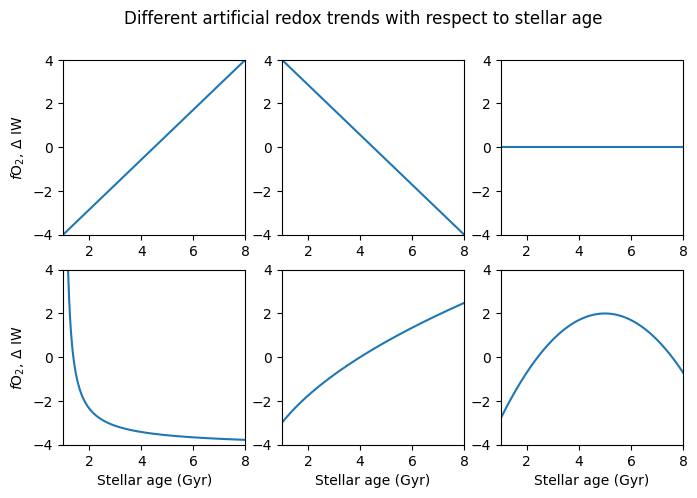

In [68]:
# define redox state function

def redox_linear(t):
    x = [1,8]
    y = [-4,4]
    return np.interp(t,x,y)

def redox_minlinear(t):
    x = [1,8]
    y = [4,-4]
    return np.interp(t,x,y)

def redox_constant(t):
    return t*0

def redox_sqrt(t):
    return 3*(t**0.5-2)

def redox_inverse(t):
    return 1.5*(1/np.log(t)-3)

def redox_parabola(t):
    return -0.3*(t-5)**2+2
time = np.linspace(1,8,1000)
fig = figure(figsize=(8,5))
frame1 = fig.add_subplot(2,3,1)
frame1.plot(time,redox_linear(time))
frame1.set_xlim(1,8)
frame1.set_ylim(-4,4)
# frame1.set_xlabel('stellar age (Gyr)')
frame1.set_ylabel('$f$O$_2$, $\Delta$ IW')

frame2 = fig.add_subplot(2,3,2)
frame2.plot(time,redox_minlinear(time))
frame2.set_xlim(1,8)
frame2.set_ylim(-4,4)
# frame2.set_xlabel('stellar age (Gyr)')
# frame2.set_ylabel('fo2 (IW)')

frame3 = fig.add_subplot(2,3,3)
frame3.plot(time,redox_constant(time))
frame3.set_xlim(1,8)
frame3.set_ylim(-4,4)
# frame3.set_xlabel('stellar age (Gyr)')
# frame3.set_ylabel('fo2 (IW)')

frame4 = fig.add_subplot(2,3,4)
frame4.plot(time,redox_inverse(time))
frame4.set_xlim(1,8)
frame4.set_ylim(-4,4)
frame4.set_xlabel('Stellar age (Gyr)')
frame4.set_ylabel('$f$O$_2$, $\Delta$ IW')


frame5 = fig.add_subplot(2,3,5)
frame5.plot(time,redox_sqrt(time))
frame5.set_xlim(1,8)
frame5.set_ylim(-4,4)
frame5.set_xlabel('Stellar age (Gyr)')
# frame5.set_ylabel('fo2 (IW)')


frame6 = fig.add_subplot(2,3,6)
frame6.plot(time,redox_parabola(time))
frame6.set_xlim(1,8)
frame6.set_ylim(-4,4)
frame6.set_xlabel('Stellar age (Gyr)')
#frame6.set_ylabel('fo2 (IW)')

fig.suptitle('Different artificial redox trends with respect to stellar age')
show()


In [232]:
data = np.genfromtxt("../output/planet_population.txt",skip_header=2)
titles = np.genfromtxt("../output/planet_population.txt",dtype='str')[1]

# do stellar types separately because genfromtxt can't handle floats and strings
stellartypes = np.genfromtxt("../output/planet_population.txt",skip_header=2,usecols=25,dtype=str)

# find splits in data
splits = []
testnumber = 0
for i in range(len(data)):
    if data[i][0] != testnumber:
        testnumber = data[i][0]
        splits.append(i)

universe1 = data[:splits[0]]
stellartypes1 = stellartypes[:splits[0]]

# make population table: distance, stellartype, age, true redox state
planet_population = []
for i in range(len(universe1)):
    age = random_age(1)[0]
    planet_population.append([universe1[i][24],stellartypes1[i],age,redox_linear(age)])

print(planet_population[0:10])

[[27.54, 'G', 6.098814571782468, 1.827216653465678], [27.54, 'G', 2.168831178442919, -2.664192938922378], [27.54, 'G', 5.202572155055696, 0.8029396057779383], [27.54, 'G', 1.7157911316018668, -3.1819529924550096], [27.54, 'G', 4.220245321063897, -0.31971963306983264], [25.28, 'K', 2.9872579851594208, -1.728848016960662], [25.28, 'K', 6.237168545497275, 1.985335480568314], [25.28, 'K', 4.781436934735738, 0.3216422111265578], [25.28, 'K', 5.510083156364905, 1.1543807501313195], [26.08, 'G', 4.876125336208079, 0.4298575270949474]]


In [234]:
# define observed redox function

def redox_retrieval(distance,stellartype,trueredox,integrationtime):
    # artificially add random noise to the true redox input
    distance_error = np.interp(distance,[5.11,29.99],[0,1])
    if stellartype == 'F':
        stellar_error = 0.3
    elif stellartype == 'G':
        stellar_error = 0.2
    else:
        stellar_error = 0.4
    integration_error = np.interp(integrationtime,[5,15],[1,0])
    total_error = stellar_error+integration_error+distance_error
    
    redox_error = np.random.uniform(-total_error,total_error)
    result = trueredox + redox_error
    return result

test = redox_retrieval(planet_population[0][0].astype(float),planet_population[0][1],planet_population[0][3].astype(float),10)

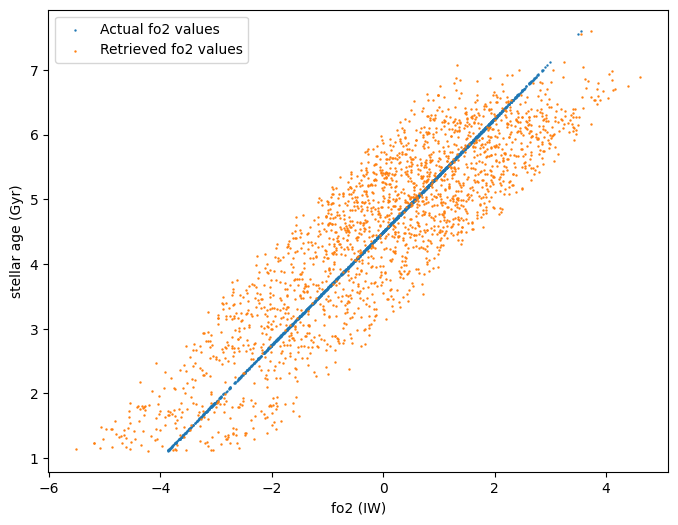

In [238]:
# do survey

redoxsurveyresults = []

for i in planet_population:
    retrieved_redox = [redox_retrieval(i[0].astype(float),i[1],i[3].astype(float),10)]
    redoxsurveyresults.append([i[3].astype(float),retrieved_redox[0]])

redoxsurveyresults = np.array(redoxsurveyresults)


fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
frame1.scatter(redoxsurveyresults[:,0],np.array(planet_population)[:,2].astype(float),s=0.5,label='Actual fo2 values')
frame1.scatter(redoxsurveyresults[:,1],np.array(planet_population)[:,2].astype(float),s=0.5,label='Retrieved fo2 values')
frame1.set_xlabel('fo2 (IW)')
frame1.set_ylabel('stellar age (Gyr)')
frame1.legend()
show()





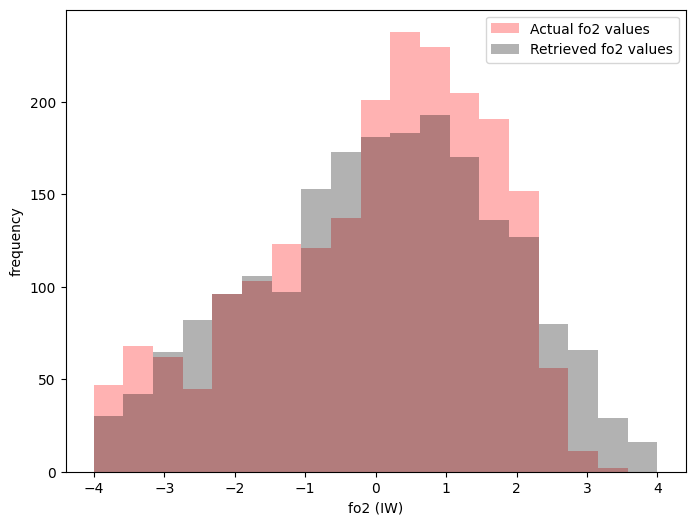

In [251]:
fig = figure(figsize=(8,6))
frame1 = fig.add_subplot(1,1,1)
bins = np.linspace(-4,4,20)
frame1.hist(redoxsurveyresults[:,0],bins,alpha=0.3,label='Actual fo2 values',color="red")
frame1.hist(redoxsurveyresults[:,1],bins,label='Retrieved fo2 values',alpha=0.3,color="black")
frame1.set_xlabel('fo2 (IW)')
frame1.set_ylabel('frequency')
frame1.legend()
show()
